In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = (7, 7)


In [2]:
class MustafaModule:
    linestyle = "solid"
    label = "vqa captioning"
    lines = [
        {"lambda": 0.0, "cider": 40.83, "val": 73.52},
        {"lambda": 0.2, "cider": 60.29, "val": 73.93},
        {"lambda": 0.4, "cider": 94.50, "val": 74.43},
        {"lambda": 0.6, "cider": 123.74, "val": 72.62},
        {"lambda": 0.8, "cider": 135.01, "val": 65.27},
        {"lambda": 1.0, "cider": 140.04, "val": 26.68}]
modules = [
    MustafaModule
    
]

In [3]:


def create_colormaps():
    N = 256
    dict_colormaps = {}
    def create_cmp(r,g,b):
        np_array = np.ones((N, 4))
        np_array[:, 0] = np.linspace(r/256, 1, N)
        np_array[:, 1] = np.linspace(g/256, 1, N)
        np_array[:, 2] = np.linspace(b/256, 1, N)
        return ListedColormap(np_array)

    dict_colormaps["Yellows"] = create_cmp(255, 232, 11)
    dict_colormaps["Light_Yellows"] = create_cmp(255, 232, 200)
    dict_colormaps["Dark_Blues"] = create_cmp(2, 2, 200)
    dict_colormaps["Blues_Greys"] = create_cmp(40, 60, 80)
    dict_colormaps["Dark_Greys"] = create_cmp(40, 60, 200)

    return dict_colormaps

In [29]:
def get_x(ll, key):
    return [x[key] for x in ll]

def interpolate_points(val1, val2, order, label, color, ax=None, linestyle="-"):
    
    if order == "connect":
        ax.plot(
            val1,
            val2,
            label=label,
            color=color,
            linestyle=linestyle,
        )
        return

    get_x1_sorted = np.linspace(min(val1), max(val1), 500000)
             
    if order in [1, "1"]:
        m, b = np.polyfit(val1, val2, 1)
        preds = m * np.array(get_x1_sorted) + b
    elif order in [2, "2"]:
        m2, m1, b = np.polyfit(val1, val2, 2)
        preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
    elif order in [3, "3"]:
        m3, m2, m1, b = np.polyfit(val1, val2, 3)
        preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(
            get_x1_sorted
        ) + b
    elif order in [4, "4"]:
        m4, m3, m2, m1, b = np.polyfit(val1, val2, 4)
        preds = m4 * np.array(get_x1_sorted)**4 + m3 * np.array(get_x1_sorted)**3 + m2 * np.array(
            get_x1_sorted
        )**2 + m1 * np.array(get_x1_sorted) + b
    elif order in [5, "5"]:
        m5, m4, m3, m2, m1, b = np.polyfit(val1, val2, 5)
        preds = m5 * np.array(get_x1_sorted)**5 + m4 * np.array(get_x1_sorted)**4 + m3 * np.array(
            get_x1_sorted
        )**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
    elif order == "log":
        m1, b = np.polyfit(np.log(val1), val2, 1)
        log_get_x1_sorted = np.log(get_x1_sorted)
        preds = m1 * np.array(log_get_x1_sorted) + b
    elif order == "2log":
        m2, m1, b = np.polyfit(np.log(val1), val2, 2)
        log_get_x1_sorted = np.log(get_x1_sorted)
        preds = m2 * np.array(log_get_x1_sorted)**2 + m1 * np.array(log_get_x1_sorted) + b
    elif order == "3log":
        m3, m2, m1, b = np.polyfit(np.log(val1), val2, 3)
        log_get_x1_sorted = np.log(get_x1_sorted)
        preds = m3 * np.array(log_get_x1_sorted)**3 + m2 * np.array(
            log_get_x1_sorted
        )**2 + m1 * np.array(log_get_x1_sorted) + b
    else:
        assert order in [0, -1, None, "", "0"]
        
    ax.plot(
        get_x1_sorted, preds, color=color, linestyle=linestyle, linewidth=3, label=label
    )

In [30]:


def plot_lines(
    l,
    key_x,
    key_y,
    order="connect", # can be 0, 1 or 2
    labels=None,
    markers=None,
    key_color=None,
    colormaps=None,
    colors=None,
    linestyles=None,
    loc="upper right",
    SIZE_AXIS="small",
    title=None,
    legendtitle=None,
    kwargs={}
):
    fig, ax1 = plt.subplots()

    if colormaps is None:
        if key_color is not None:
            colormaps = [
                "Reds", "Blues", "Greens", "Oranges", "Greys", "Purples", "Reds", "Blues", "Greens",
                "Oranges", "Greys", "Purples"
            ][:len(l)]
    else:
        dict_colormaps = create_colormaps()
        colormaps = [dict_colormaps.get(cmp, cmp) for cmp in colormaps]

    if colors is None:
        if colormaps is not None:
            # dict_cmp_to_color = {
            #     "Reds": "red", "Blues": "blue", "Greens": "green", "Oranges": "orange", "Greys": "grey", "Purples": "purple", "Yellows": "yellow"
            # }
            # colors=[dict_cmp_to_color[cmp.split("_")[-1]] for cmp in colormaps]
            colors = [cm.get_cmap(cmp)(0.5) for cmp in colormaps]
        else:
            colors = cm.rainbow(np.linspace(0, 1, len(l)))

    if labels is None:
        labels = [label + str(i) for i in range(len(l))]

    plt.xlabel(key_x, fontsize=SIZE_AXIS)
    plt.ylabel(key_y, fontsize=SIZE_AXIS)


    def plot_subline(ll, color, colormap, label, marker, linestyle, key_y, ax, kwargs):
        if linestyle is not None:
            interpolate_points(
                get_x(ll, key_x),
                get_x(ll, key_y),
                order=order,
                label=label if linestyle is not None else None,
                color=color,
                linestyle=linestyle,
                ax=ax1
            )

        if key_color is not None:
            kwargs["c"] = [x for x in get_x(ll, key_color)]
            kwargs["cmap"] = colormap
        else:
            kwargs["color"] = color

        ax.scatter(
            get_x(ll, key_x),
            get_x(ll, key_y),
            label=label if linestyle is None else None,
            marker=marker,
            **kwargs
            )
        return

    for index in range(len(l)):
        label = labels[index]
        if markers is not None:
            marker = markers[index]
        else:
            marker = "o"
        label = labels[index]
        if linestyles is not None:
            linestyle = linestyles[index%len(linestyles)]
        else:
            linestyle = None
        if colormaps is not None:
            colormap = colormaps[index]
        else:
            colormap = None
        kwargs_copy = {k:v for k, v in kwargs.items()}
        plot_subline(l[index], color=colors[index], colormap=colormap, label=label, marker=marker, linestyle=linestyle, key_y=key_y, ax=ax1, kwargs=kwargs_copy)

    if loc != "no":
        ax1.legend(title=legendtitle, loc=loc, fontsize="x-large")
    if title:
        ax1.title(title, fontsize="x-large")
    return fig

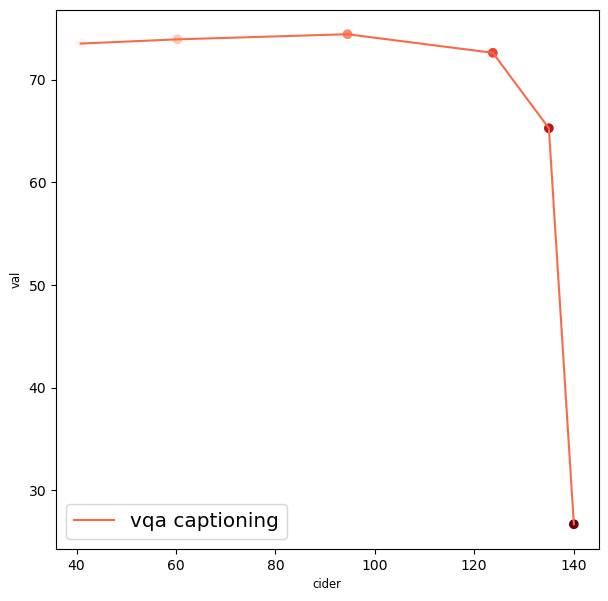

In [32]:

fig_dr = plot_lines(
    [module.lines for module in modules],
    key_x="cider",
    key_y="val",
    labels=[module.label for module in modules],
    loc="best",
    key_color="lambda",
    colormaps=[
        "Reds",
        "Purples",
        "Oranges",
        "Greys",
        "Blues",
        "Yellows",
        "Greens",
    ],
    linestyles=[module.linestyle for module in modules],
    order="connect", # or "2"
)